<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Load and Prepare Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# # Find the mode of month in data
# Rating_mode = df.Rating.mode()[0]

# # Fill the missing values with mode value of month in data.
# df.Rating.fillna(Rating_mode, inplace = True)

# # Let's see the null values in the month column.
# df.Rating.isnull().sum()

## Data Preprocessing

In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Strorytelling - Visualization

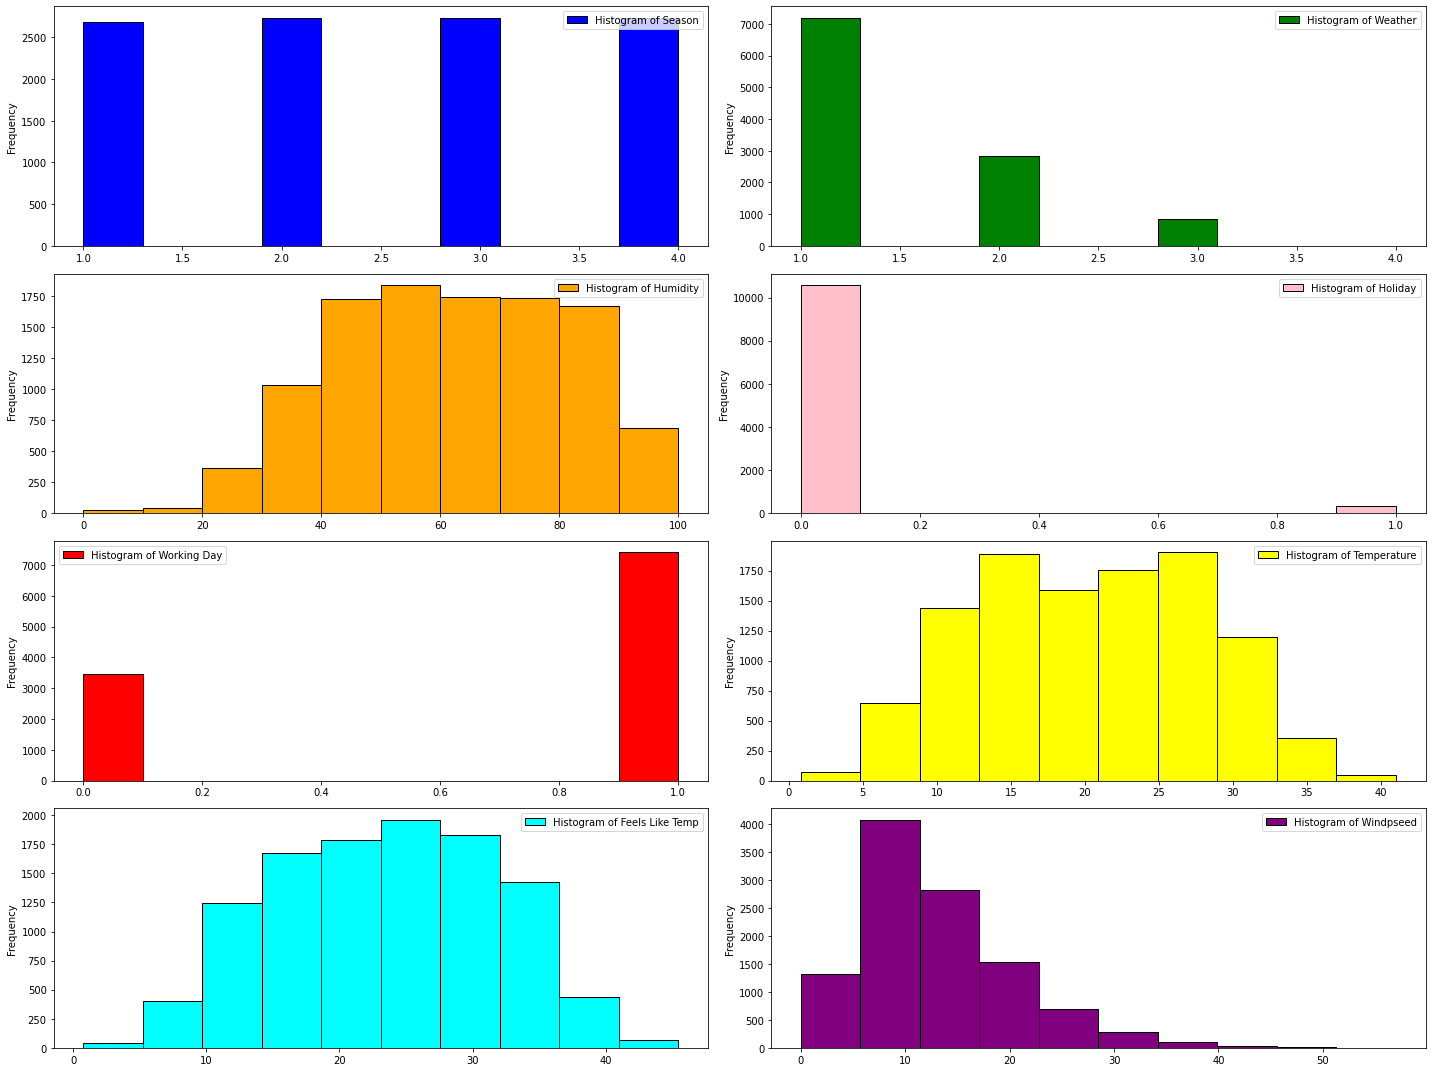

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(421)

df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)

df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)

df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)

df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)

df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)

df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)

df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)

df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [9]:
train_df = pd.read_csv('train.csv')
train_df['data_set'] = 'train'


test_df = pd.read_csv('test.csv')
test_df['data_set'] = 'test'


test_df['registered'] = 0
test_df['casual'] = 0
test_df['count'] = 0

all_df = pd.concat([train_df, test_df])
all_df.columns = map(str.lower, all_df.columns)


dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)


for col in ['casual', 'registered', 'count']:
    all_df['%s_log' % col] = np.log(all_df[col] + 1)
    
    
    
all_df['date'] = dt.date
all_df['day'] = dt.day
all_df['month'] = dt.month
all_df['year'] = dt.year
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek
all_df['woy'] = dt.weekofyear


all_df["weather"] = all_df["weather"].interpolate(method='time').apply(np.round)
all_df["temp"] = all_df["temp"].interpolate(method='time')
all_df["atemp"] = all_df["atemp"].interpolate(method='time')
all_df["humidity"] = all_df["humidity"].interpolate(method='time').apply(np.round)
all_df["windspeed"] = all_df["windspeed"].interpolate(method='time')


by_season = all_df[all_df['data_set'] == 'train'].copy().groupby(['season'])[['count']].agg(sum)
by_season.columns = ['count_season']
all_df = all_df.join(by_season, on='season')

by_season

C:\Users\se7en\AppData\Local\Temp/ipykernel_16428/2736057726.py:32: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  all_df['woy'] = dt.weekofyear


count_season
season              
1             312498
2             588282
3             640662
4             544034

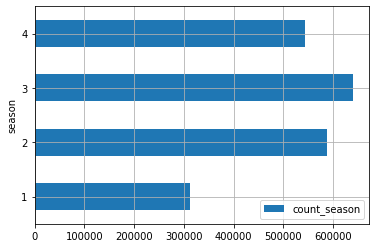

In [10]:
by_season.plot(kind='barh')
plt.grid(True)
plt.show();

C:\Users\se7en\AppData\Local\Temp/ipykernel_16428/527097472.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  all_df.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
C:\Users\se7en\AppData\Local\Temp/ipykernel_16428/527097472.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  all_df.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1
C:\Users\se7en\AppData\Local\Temp/ipykernel_16428/527097472.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  all_df.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
C:\Users\se7en\AppData\Local\Temp/ipykernel_16428/527097472.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future v

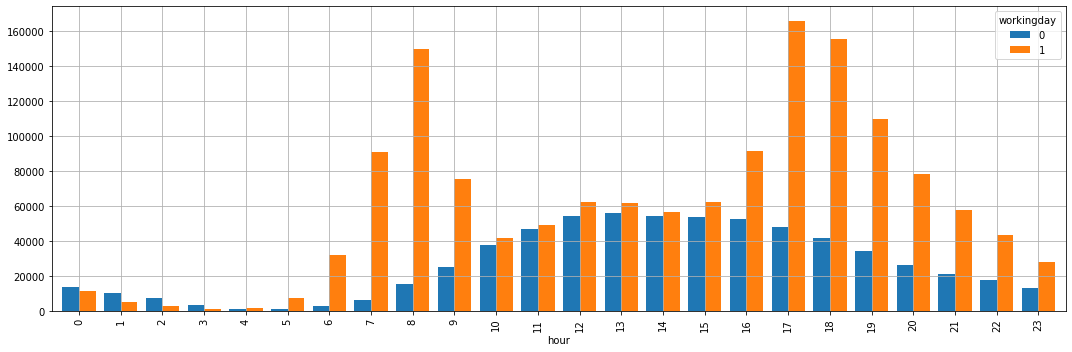

In [11]:
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

#storms
all_df.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1

#tornado
all_df.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1


by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()


# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar', figsize=(15,5), width=0.8);
plt.grid(True)
plt.tight_layout();

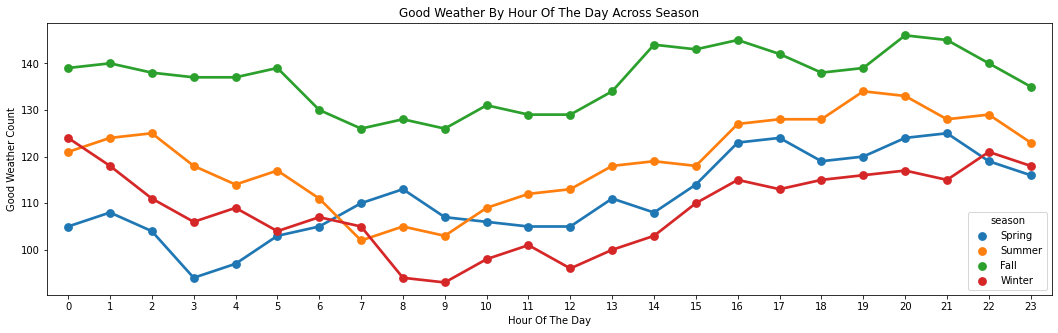

In [12]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weather'] == 1][['hour', 'season']].copy()
data = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");

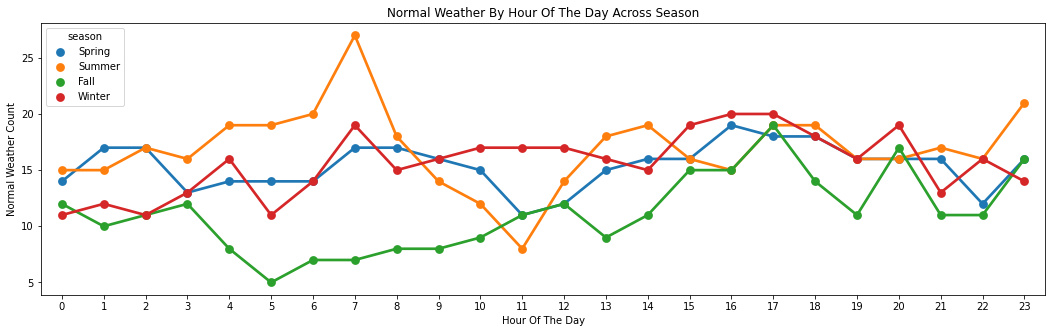

In [13]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
normal_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : normal_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])


fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

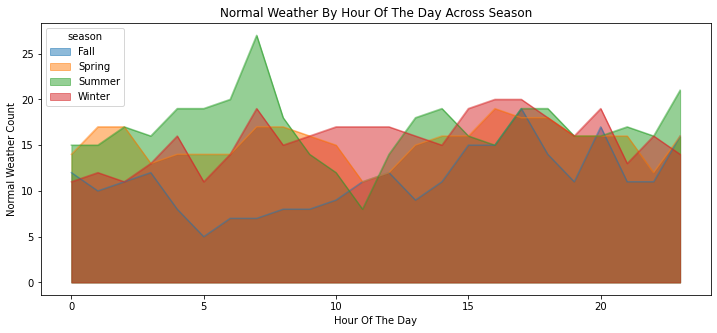

In [14]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')


fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

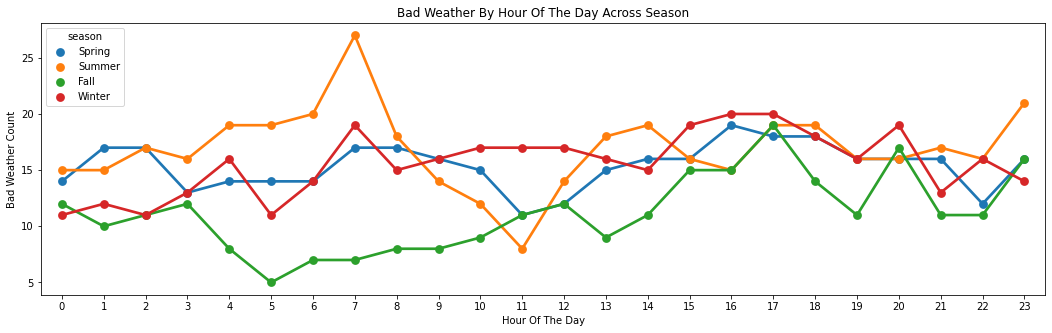

In [15]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

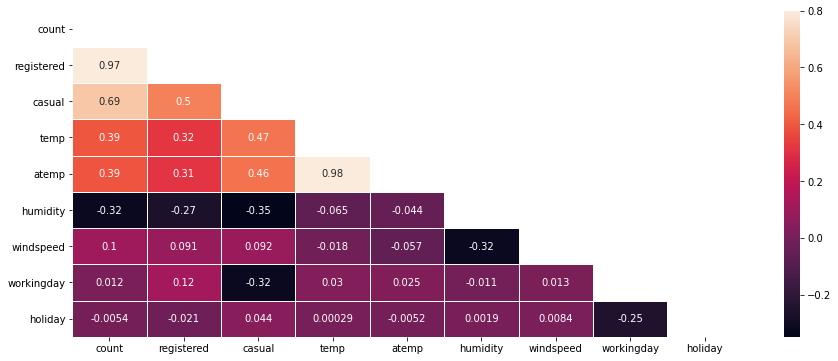

In [16]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]
sub_df.corr()
corrMatt = sub_df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

## Train your model (Regression)

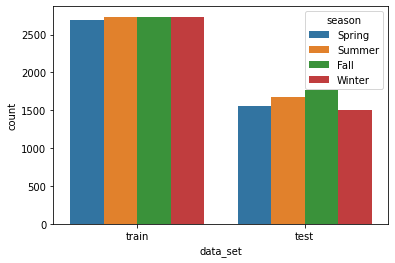

In [17]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = all_df[['data_set', 'season']].copy()
data['season'] = data['season'].map(lambda d : season_map[d])

sns.countplot(x="data_set", hue="season", data=data);

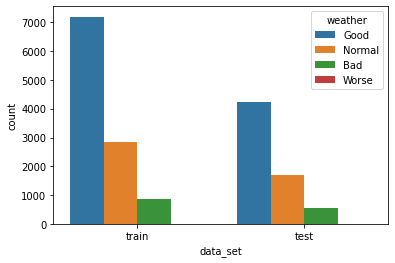

In [18]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = all_df[['data_set', 'weather']].copy()
data['weather'] = data['weather'].map(lambda d : weather_map[d])

sns.countplot(x="data_set", hue="weather", data=data);

In [19]:

train_df = all_df[all_df['data_set'] == 'train']
test_df = all_df[all_df['data_set'] == 'test']

def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]

    return train, valid

def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data['registered_log'].values
    y_c = data['casual_log'].values

    return X, y_r, y_c

# predict on validation set & transform output back from log scale
def predict_on_validation_set(model, input_cols):
    
    train, valid = custom_train_valid_split(train_df)

    # prepare training & validation set
    X_train, y_train_r, y_train_c = prep_train_data(train, input_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid, input_cols)

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_valid)) - 1

    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_valid)) - 1

    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0

    y_actual_comb = np.exp(y_valid_r) + np.exp(y_valid_c) - 2

    rmsle = get_rmsle(y_pred_comb, y_actual_comb)
    return (y_pred_comb, y_actual_comb, rmsle)


# predict on test set & transform output back from log scale
def predict_on_test_set(model, input_cols):
    
    # prepare training set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)

    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_test)) - 1

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_test)) - 1
    
    # add casual & registered predictions together
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    
    return y_pred_comb









params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'dow', 'woy'
    ]

(rf_pred, rf_actual, rf_rmsle) = predict_on_validation_set(rf_model, rf_cols)




rf_rmsle

0.4348910748101168

In [20]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'count_season',
]

(gbm_pred, gbm_actual, gbm_rmsle) = predict_on_validation_set(gbm_model, gbm_cols)
gbm_rmsle

0.31187036025042736

## Test Result

In [21]:
# Level 0 RandomForestRegressor
rf_params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'dow', 'woy'
    ]

# Level 0 GradientBoostingRegressor
gbm_params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**gbm_params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'count_season',
]

clf_input_cols = [rf_cols, gbm_cols]
clfs = [rf_model, gbm_model]

# Create train and test sets for blending and Pre-allocate the data
blend_train = np.zeros((train_df.shape[0], len(clfs)))
blend_test = np.zeros((test_df.shape[0], len(clfs)))

# For each classifier, we train the classifier with its corresponding input_cols 
# and record the predictions on the train and the test set
for clf_index, (input_cols, clf) in enumerate(zip(clf_input_cols, clfs)):
    
    # prepare training and validation set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)
    
    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_r = clf.fit(X_train, y_train_r)
    y_pred_train_r = np.exp(model_r.predict(X_train)) - 1
    y_pred_test_r = np.exp(model_r.predict(X_test)) - 1

    model_c = clf.fit(X_train, y_train_c)
    y_pred_train_c = np.exp(model_c.predict(X_train)) - 1
    y_pred_test_c = np.exp(model_c.predict(X_test)) - 1

    y_pred_train_comb = np.round(y_pred_train_r + y_pred_train_c)
    y_pred_train_comb[y_pred_train_comb < 0] = 0
    
    y_pred_test_comb = np.round(y_pred_test_r + y_pred_test_c)
    y_pred_test_comb[y_pred_test_comb < 0] = 0
    
    blend_train[:, clf_index] = y_pred_train_comb
    blend_test[:, clf_index] = y_pred_test_comb
    
    
# Level 1 Belending Classifier using LinearRegression
from sklearn.linear_model import LinearRegression
bclf = LinearRegression(fit_intercept=False)
bclf.fit(blend_train, train_df['count'])


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)


bclf.coef_

array([0.26348177, 0.77878102])

In [22]:
# Stacked and Blending predictions
y_pred_blend = np.round(bclf.predict(blend_test))

# R^2 score
bclf.score(blend_train, train_df['count'])



0.9646432740948776

In [23]:
# output predictions for submission
submit_stack_blend_df = test_df[['datetime', 'count']].copy()
submit_stack_blend_df['count'] = y_pred_blend

submit_stack_blend_df.head()

datetime  count
datetime                                       
2011-01-20 00:00:00  2011-01-20 00:00:00   13.0
2011-01-20 01:00:00  2011-01-20 01:00:00    5.0
2011-01-20 02:00:00  2011-01-20 02:00:00    3.0
2011-01-20 03:00:00  2011-01-20 03:00:00    2.0
2011-01-20 04:00:00  2011-01-20 04:00:00    2.0

## Send us the Result (Maktabkhoone)